### 1、series对象
#### series是特殊的numpy数组
#### series 也可以看成特殊的字典

In [1]:
import pandas as pd
import numpy as np

#### 新建series对象
pd.Series(data,index=index)

index是可选的，默认是整数

In [3]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [4]:
pd.Series({2:'a',3:'b',4:'d'})

2    a
3    b
4    d
dtype: object

### 2、DataFrame对象
#### DataFrame可以看成特殊的二维numpy array
#### DataFrame也可以看成特殊的字典

In [12]:
#pd.DataFrame(np.random.randn(10,4),columns=['a','b','c','d'])  #columns只要是个迭代器都可以 
pd.DataFrame(np.random.randn(10,4),columns=list('abcd'))

,a,b,c,d
0,-0.380489,-0.486028,0.603215,-1.771787
1,1.437129,-0.755483,0.981036,-1.972936
2,-0.298966,-1.489507,2.502863,-0.375885
3,1.190508,-1.296468,-0.772144,0.429277
4,0.419721,0.370908,1.258019,0.699990
5,0.120938,0.328102,-0.909212,-0.234109
6,0.042524,0.813552,1.276997,0.938148
7,0.256566,1.058199,-1.054613,0.551144
8,1.446075,-0.536839,-1.249314,-1.200882
9,0.726639,-0.136872,-1.298314,-0.840780


#### 新建DataFrame

#### 注意只有一列的DateFrame跟series不同

In [13]:
score=pd.Series({'语文':80,'数学':78,'英语':90})

In [14]:
score

语文    80
数学    78
英语    90
dtype: int64

In [15]:
p0 = pd.DataFrame(score,columns=['score'])

In [16]:
p0

,score
语文,80
数学,78
英语,90


In [19]:
p0.iloc[:,0]

语文    80
数学    78
英语    90
Name: score, dtype: int64

### 3、数据索引与选择

In [21]:
p0  = pd.DataFrame({'x':np.random.randn(3),'y': np.random.randn(3)})

In [22]:
p0

,x,y
0,0.930680,-0.988089
1,0.363939,1.826449
2,-0.808236,-0.718449


In [23]:
p0['x']

0    0.930680
1    0.363939
2   -0.808236
Name: x, dtype: float64

In [24]:
p0['z']=p0['x']*p0['y']

In [25]:
p0

,x,y,z
0,0.930680,-0.988089,-0.919595
1,0.363939,1.826449,0.664716
2,-0.808236,-0.718449,0.580677


In [28]:
p0.values

array([[ 0.9306804 , -0.98808946, -0.91959549],
       [ 0.36393907,  1.8264492 ,  0.66471622],
       [-0.80823646, -0.71844882,  0.58067653]])

In [29]:
p0.keys

<bound method NDFrame.keys of           x         y         z
0  0.930680 -0.988089 -0.919595
1  0.363939  1.826449  0.664716
2 -0.808236 -0.718449  0.580677>

In [30]:
p0.T #转置操作

,0,1,2
x,0.930680,0.363939,-0.808236
y,-0.988089,1.826449,-0.718449
z,-0.919595,0.664716,0.580677


In [31]:
p0.loc[:1,['x','y']]

,x,y
0,0.930680,-0.988089
1,0.363939,1.826449


In [41]:
p0.loc[:1,:1] #报错，必须用显示定义的index

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

In [39]:
p0.iloc[:,1:3]

,y,z
0,-0.988089,-0.919595
1,1.826449,0.664716
2,-0.718449,0.580677


#### loc 与iloc的区别

loc 函数用在 显示索引（explicit index） #明确定义的行名 或列名

iloc 函数用在 隐式索引（implicit index）#隐含的行号或列号

In [43]:
p0.loc[p0.x>0.5,['x','y']]  #fancy indexing

,x,y
0,0.93068,-0.988089


#### 其他的约定，索引对应列，切片对应行

In [44]:
p0['x']

0    0.930680
1    0.363939
2   -0.808236
Name: x, dtype: float64

In [45]:
p0[1]  #这样就错了，并不能得到第一行或者第一列

KeyError: 1

In [46]:
p0[:1]  #这样就能取到第一行

,x,y,z
0,0.93068,-0.988089,-0.919595


In [48]:
p0[p0.x>0.5]

,x,y,z
0,0.93068,-0.988089,-0.919595


### 4、操作pandas数据

#### 4.1、索引保留
无论怎么操作数据，索引是不会变得

In [50]:
ser = pd.Series(np.random.rand(5))
df = pd.DataFrame(np.random.rand(5,3),columns=list('abc'))

In [51]:
df

,a,b,c
0,0.794290,0.917582,0.820498
1,0.068763,0.294794,0.324678
2,0.103335,0.268930,0.822549
3,0.684143,0.896422,0.091903
4,0.821929,0.599290,0.517877


In [52]:
np.random.rand(5,3) # rand返回0-1之间的数  randn返回具有标准正态分布的数

array([[0.3343115 , 0.67560673, 0.78334346],
       [0.67096031, 0.39960013, 0.42768593],
       [0.59730422, 0.59794123, 0.48302844],
       [0.87510261, 0.23524481, 0.53463134],
       [0.95962014, 0.90916096, 0.40771259]])

In [54]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]],columns=list('abc'))

####  索引对齐
没有的行或者列用空替代，完成运算

In [56]:
s0 = pd.Series({"x": 3, "y": 2.3, "z":2.1})
s1 = pd.Series({"x": 3, "y": 2.3, "m":2.1, "n":2.22})

In [58]:
s0/s1   # NaN ： not a number

m    NaN
n    NaN
x    1.0
y    1.0
z    NaN
dtype: float64

In [59]:
s0.divide(s1,fill_value=0.0)  # inf: infinite 无穷大

m    0.000000
n    0.000000
x    1.000000
y    1.000000
z         inf
dtype: float64

In [60]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)),
                             columns=list('AB'))
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                             columns=list('BAC'))

In [61]:
A

,A,B
0,16,9
1,3,12


In [62]:
B

,B,A,C
0,6,5,9
1,9,0,7
2,6,6,0


In [63]:
A+B

,A,B,C
0,21.0,15.0,NaN
1,3.0,21.0,NaN
2,NaN,NaN,NaN


#### DataFrame与series之间的操作

In [64]:
df = pd.DataFrame(np.random.randn(4,3),columns=list('abc'))

In [65]:
df

,a,b,c
0,-0.778801,1.839417,-1.225217
1,0.372927,-0.351058,-0.112746
2,-0.252869,-0.624474,0.482081
3,-0.515879,0.486595,-0.157989


In [69]:
df - df.iloc[0]

,a,b,c
0,0.000000,0.000000,0.000000
1,1.151728,-2.190475,1.112471
2,0.525932,-2.463892,1.707298
3,0.262922,-1.352822,1.067227


### 5、处理缺失值
pandas中用NaN(not a number)表示缺省值

#### 处理缺失值的函数
isnull

notnull

dropna

fillna


In [75]:
p1 = pd.Series([2, 2, 3, None])

In [76]:
p1

0    2.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [77]:
p1.drop_duplicates()  #删除重复值

0    2.0
2    3.0
3    NaN
dtype: float64

### 6、层级索引
层级索引的目的是用series和DataFrame表示高维数据

In [78]:
index = [('California', 2000), ('California', 2010),
        ('New York', 2000), ('New York', 2010),
        ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
                18976457, 19378102,
                20851820, 25145561]
pop = pd.Series(populations, index=index)

In [79]:
index

[('California', 2000),
 ('California', 2010),
 ('New York', 2000),
 ('New York', 2010),
 ('Texas', 2000),
 ('Texas', 2010)]

In [80]:
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [81]:
pop[[i for i in pop.index if i[1]==2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [83]:
#上面的方法取数据就比较繁琐，如果用层级索引的话就简单了
#新建一个层级索引
index1 = pd.MultiIndex.from_tuples(index)

In [84]:
index1

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [85]:
pop1 = pop.reindex(index1)

In [86]:
pop1

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [87]:
pop1[:,2010]  #因为现在pop1是两个维度的索引，第一个表示第一个维度的索引，第二个表示第二个维度的索引

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [88]:
pop_df = pop1.unstack()  #从series变为DataFrame了

In [89]:
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [90]:
pop_df.stack() #从DataFrame变为series

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### 将具有MultiIndex的Series增加一列, 就是具有MultiIndex的DataFrame.

In [91]:
pop_df1 = pd.DataFrame({'total':pop1,
                       'under18':[9267089, 9284094,
                        4687374, 4318033,
                        5906301, 6879014]})

In [92]:
pop_df1

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [93]:
f_u18 = pop_df1['under18']/pop_df1['total']

In [94]:
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

#### 创建Multiindex的方法

In [95]:
df = pd.DataFrame(np.random.rand(4,2), index=[['a','a','b','b'],[1,2,1,2]],columns=['data1','data2'])

In [96]:
df

data1     data2
a 1  0.758436  0.889996
  2  0.675613  0.400856
b 1  0.955669  0.252351
  2  0.520057  0.726948

In [97]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [98]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [99]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [100]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

##### 创建一个层级索引的DataFrame

In [105]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])
#data
data = np.round(np.random.randn(4, 6), 1)

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject     Bob      Guido       Sue     
type         HR Temp    HR Temp   HR Temp
year visit                               
2013 1     -0.8 -0.5  -0.4 -0.8  0.3 -0.4
     2     -0.9 -0.5  -0.0 -0.2  1.3 -0.6
2014 1      0.5 -0.1   0.3  0.6  1.4  0.7
     2      0.3  0.4   0.2 -1.0  0.6  2.5

In [106]:
health_data['Bob']

type         HR  Temp
year visit           
2013 1     -0.8  -0.5
     2     -0.9  -0.5
2014 1      0.5  -0.1
     2      0.3   0.4

#### 多级索引的取值与切片

In [107]:
pop1

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [108]:
type(pop1)

pandas.core.series.Series

In [111]:
pop1['California',2000]

33871648

In [112]:
health_data

subject     Bob      Guido       Sue     
type         HR Temp    HR Temp   HR Temp
year visit                               
2013 1     -0.8 -0.5  -0.4 -0.8  0.3 -0.4
     2     -0.9 -0.5  -0.0 -0.2  1.3 -0.6
2014 1      0.5 -0.1   0.3  0.6  1.4  0.7
     2      0.3  0.4   0.2 -1.0  0.6  2.5

In [120]:
health_data['Bob','HR']

year  visit
2013  1       -0.8
      2       -0.9
2014  1        0.5
      2        0.3
Name: (Bob, HR), dtype: float64

In [123]:
health_data.loc[:2,('Bob','HR')] #这样写就有问题了

Series([], Name: (Bob, HR), dtype: float64)

In [135]:
idx = pd.IndexSlice
health_data.loc[idx[:,2],idx[:,'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,2,-0.9,-0.0,1.3
2014,2,0.3,0.2,0.6


In [139]:
health_data.loc[idx[2014,2],idx[:,'HR']]

subject  type
Bob      HR      0.3
Guido    HR      0.2
Sue      HR      0.6
Name: (2014, 2), dtype: float64

In [140]:
pop1

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [142]:
pop_flat = pop1.reset_index(name='population')  #把多重索引展开成二维的
pop_flat

,level_0,level_1,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [144]:
pop_flat.set_index(['level_0','level_1'])

population
level_0    level_1            
California 2000       33871648
           2010       37253956
New York   2000       18976457
           2010       19378102
Texas      2000       20851820
           2010       25145561

#### 层级索引统计方法

In [145]:
health_data

subject     Bob      Guido       Sue     
type         HR Temp    HR Temp   HR Temp
year visit                               
2013 1     -0.8 -0.5  -0.4 -0.8  0.3 -0.4
     2     -0.9 -0.5  -0.0 -0.2  1.3 -0.6
2014 1      0.5 -0.1   0.3  0.6  1.4  0.7
     2      0.3  0.4   0.2 -1.0  0.6  2.5

In [147]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob       Guido       Sue     
type       HR  Temp    HR Temp   HR Temp
year                                    
2013    -0.85 -0.50 -0.20 -0.5  0.8 -0.5
2014     0.40  0.15  0.25 -0.2  1.0  1.6

In [148]:
data_mean.mean(axis=1,level='type')

type,HR,Temp
year,,
2013,-0.083333,-0.500000
2014,0.550000,0.516667


### 7、合并数据集 join and merge

#### 一对一连接

In [149]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                        'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})

In [150]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [151]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [152]:
df3 = pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


#### 多对一连接

In [153]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                               'supervisor': ['Carly', 'Guido', 'Steve']})

In [154]:
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [155]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


#### 多对多连接

In [156]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                                         'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                                      'spreadsheets', 'organization']})

In [158]:
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [159]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


### 8、累计与分组
#### groupBy：分割，应用和组合

In [160]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [161]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### groupby对象

In [162]:
import seaborn as sns
planets = sns.load_dataset('planets') 

planets.shape

(1035, 6)

In [163]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [164]:
planets.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [165]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [166]:
planets.head(2)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008


In [167]:
planets.groupby('method')['orbital_period'].mean() #把orbital_period这列按照method列group by 并求均值

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [168]:
for (method, group) in planets.groupby('method'): 
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [173]:
planets.groupby('method')['orbital_period'].count()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           12
Microlensing                       7
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          3
Name: orbital_period, dtype: int64

In [174]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [175]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                'data1': range(6),
                'data2': np.random.randint(0, 10, 6)},
                 )
df

,key,data1,data2
0,A,0,5
1,B,1,5
2,C,2,0
3,A,3,6
4,B,4,3
5,C,5,5


In [177]:
df.groupby('key')['data2'].aggregate(['min',np.median,max])  #groupby后同时使用多个函数

,min,median,max
key,,,
A,5,5.5,6
B,3,4.0,5
C,0,2.5,5


In [178]:
df.groupby('key').aggregate({'data1': 'min',
                            'data2': 'max'})  #groupby 后对不同的列用不同的函数

,data1,data2
key,,
A,0,6
B,1,5
C,2,5


In [179]:
def filter_func(x):
    return x['data1'].max() > 4

In [180]:
df.groupby('key').filter(filter_func)  #groupby后使用自定义函数

,key,data1,data2
2,C,2,0
5,C,5,5


In [183]:
df.groupby('key').transform(lambda x: x - x.mean())  #对每个数都减去 按某个组分组后的平均值

,data1,data2
0,-1.5,-0.5
1,-1.5,1.0
2,-1.5,-2.5
3,1.5,0.5
4,1.5,-1.0
5,1.5,2.5


In [184]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum() 
    return x

In [185]:
df.groupby('key').apply(norm_by_data2) #归一化

,key,data1,data2
0,A,0.000000,5
1,B,0.125000,5
2,C,0.400000,0
3,A,0.272727,6
4,B,0.500000,3
5,C,1.000000,5


#### 设置分割的键 

In [186]:
df2 = df.set_index('key')
df2

,data1,data2
key,,
A,0,5
B,1,5
C,2,0
A,3,6
B,4,3
C,5,5


In [187]:
mapping = {'A': 'vowel', 'B': 'consonant', 
           'C': 'consonant'}
mapping

{'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}

In [189]:
df2.groupby(mapping).sum()   #把ABC做一个映射再groupby

,data1,data2
consonant,12,13
vowel,3,11


In [193]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'

In [194]:
planets.groupby(['method', decade])['number'].sum()

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [196]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### 9、可视化

In [206]:
planets.head(2)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008


In [212]:
planets['orbital_period'].head(2)

0    269.300
1    874.774
Name: orbital_period, dtype: float64

In [203]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


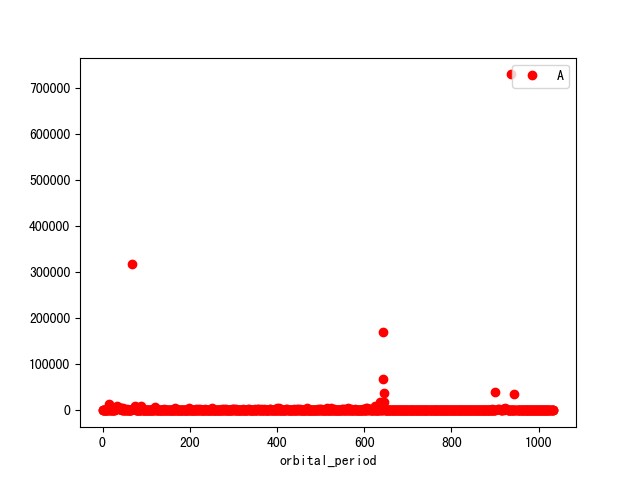

Text(0.5,0,'orbital_period')

In [214]:
fig,axes = plt.subplots()
planets['orbital_period'].plot(ax=axes,style='ro',label='A')
axes.legend()
axes.set_xlabel('orbital_period')

<IPython.core.display.Javascript object>


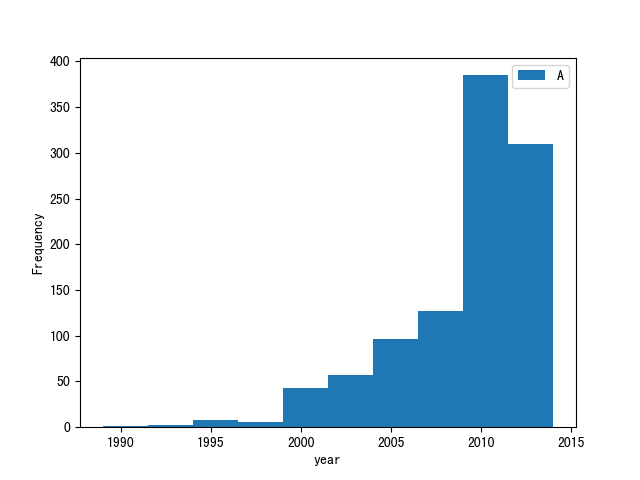

Text(0.5,0,'year')

In [219]:
fig,axes = plt.subplots()
planets['year'].plot(kind='hist',ax=axes,style='ro',label='A')
axes.legend()
axes.set_xlabel('year')

<IPython.core.display.Javascript object>


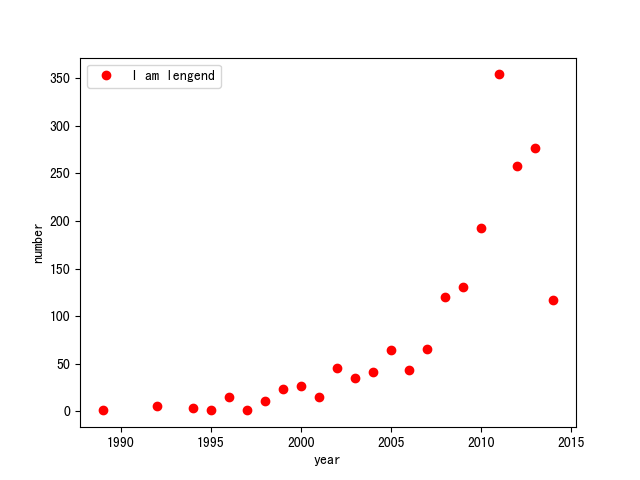

Text(0,0.5,'number')

In [226]:
fig,ax = plt.subplots()
ax = planets.groupby('year')['number'].sum().plot(x='year',y='number',style='ro',label='I am lengend')
ax.legend()
ax.set_xlabel('year')
ax.set_ylabel('number')